In [44]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
!pip install nasdaq-data-link
import nasdaqdatalink
from dotenv import load_dotenv
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [45]:
path = r"C:\Users\buitr\Desktop\Data Analyst\Data Analytics Immersion\A6"

In [46]:
# Load API key
load_dotenv()
nasdaqdatalink.ApiConfig.api_key = os.getenv("NASDAQ_DATA_LINK_API_KEY")

# Fetch GDP data in USD for all countries
data = nasdaqdatalink.get_table('WB/DATA', series_id='NY.GDP.MKTP.CD')

### I choose this data because I want to continue analysing GDP as in my main data also has GPD as the main data for analysis.

In [47]:
# filter
data = data.sort_values(['country_name', 'year'], ascending=[True, False])

# Show the latest GDP value per country
latest_gdp = data.groupby('country_name').first().reset_index()

print(latest_gdp.head())

                                 country_name       series_id country_code  \
0                                    Cambodia  NY.GDP.MKTP.CD          KHM   
1                                        Chad  NY.GDP.MKTP.CD          TCD   
2                                     Croatia  NY.GDP.MKTP.CD          HRV   
3  East Asia & Pacific (IDA & IBRD countries)  NY.GDP.MKTP.CD          TEA   
4                                 El Salvador  NY.GDP.MKTP.CD          SLV   

   year         value  
0  2023  3.177276e+10  
1  2023  1.314933e+10  
2  2023  8.268884e+10  
3  2023  2.112412e+13  
4  2023  3.401562e+10  


In [48]:
data.head()

,series_id,country_code,country_name,year,value
None,,,,,
7563,NY.GDP.MKTP.CD,KHM,Cambodia,2023,3.177276e+10
7564,NY.GDP.MKTP.CD,KHM,Cambodia,2022,2.950483e+10
7565,NY.GDP.MKTP.CD,KHM,Cambodia,2021,2.696106e+10
7566,NY.GDP.MKTP.CD,KHM,Cambodia,2020,2.587280e+10
7567,NY.GDP.MKTP.CD,KHM,Cambodia,2019,2.708939e+10


In [49]:
data.shape

(10000, 5)

In [50]:
data.columns

Index(['series_id', 'country_code', 'country_name', 'year', 'value'], dtype='object')

In [51]:
# Show unique country names and codes sorted
unique_countries = data[['country_name', 'country_code']].drop_duplicates().sort_values('country_name')
print(unique_countries)

                                    country_name country_code
None                                                         
7563                                    Cambodia          KHM
1864                                        Chad          TCD
8916                                     Croatia          HRV
1800  East Asia & Pacific (IDA & IBRD countries)          TEA
2712                                 El Salvador          SLV
...                                          ...          ...
3577                          West Bank and Gaza          PSE
302                                        World          WLD
192                                  Yemen, Rep.          YEM
64                                        Zambia          ZMB
0                                       Zimbabwe          ZWE

[183 rows x 2 columns]


In [52]:
data['country_name'].dropna().unique()

array(['Cambodia', 'Chad', 'Croatia',
       'East Asia & Pacific (IDA & IBRD countries)', 'El Salvador',
       'Equatorial Guinea', 'Eswatini',
       'Europe & Central Asia (IDA & IBRD countries)', 'French Polynesia',
       'Gabon', 'Gambia, The', 'Georgia', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Heavily indebted poor countries (HIPC)',
       'High income', 'Honduras', 'Hong Kong SAR, China', 'Hungary',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.',
       'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Korea, Rep.', 'Kosovo', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR',
       'Late-demographic dividend', 'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Carib

In [53]:
# Subset data: Vietnam only, and only from 1980 to 2019

vietnam_gdp = data[data['country_name'] == 'Viet Nam']

In [54]:
vietnam_gdp

,series_id,country_code,country_name,year,value
None,,,,,
411,NY.GDP.MKTP.CD,VNM,Viet Nam,2023,4.297170e+11
412,NY.GDP.MKTP.CD,VNM,Viet Nam,2022,4.103240e+11
413,NY.GDP.MKTP.CD,VNM,Viet Nam,2021,3.664748e+11
414,NY.GDP.MKTP.CD,VNM,Viet Nam,2020,3.466157e+11
415,NY.GDP.MKTP.CD,VNM,Viet Nam,2019,3.343653e+11
416,NY.GDP.MKTP.CD,VNM,Viet Nam,2018,3.101065e+11
417,NY.GDP.MKTP.CD,VNM,Viet Nam,2017,2.813536e+11
418,NY.GDP.MKTP.CD,VNM,Viet Nam,2016,2.570960e+11
419,NY.GDP.MKTP.CD,VNM,Viet Nam,2015,2.392583e+11


In [55]:
vietnam_gdp.isnull().sum()

series_id       0
country_code    0
country_name    0
year            0
value           0
dtype: int64

In [56]:
vietnam_gdp.duplicated().sum()

0

In [57]:
vietnam_gdp = vietnam_gdp.sort_values('year').reset_index(drop=True)

In [58]:
vietnam_gdp = vietnam_gdp.copy()

In [59]:
# Convert year to datetime format correctly
vietnam_gdp['Date'] = pd.to_datetime(vietnam_gdp['year'], format='%Y')

# Reset index
data_2 = vietnam_gdp.reset_index(drop=True)

In [60]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [63]:
data_sub.set_index('Date', inplace=True)

In [64]:
data_sub = data_sub.drop(columns=['series_id', 'country_code', 'country_name', 'year'])


In [65]:
data_sub.head()

,value
Date,
1985-01-01,1.409469e+10
1986-01-01,2.633662e+10
1987-01-01,3.665811e+10
1988-01-01,2.542381e+10
1989-01-01,6.293305e+09


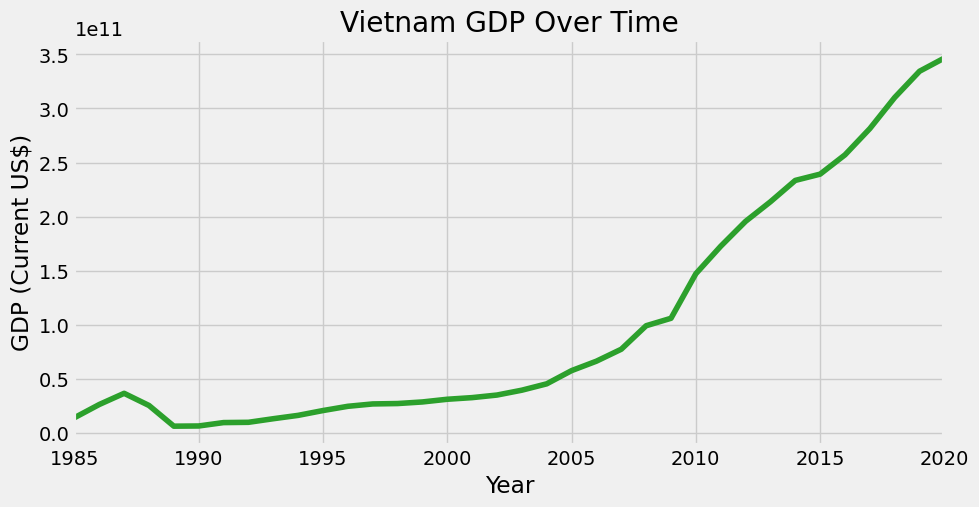

In [111]:
VN_GDP_overtime = data_sub['value'].plot(
    title='Vietnam GDP Over Time',
    figsize=(10, 5),
    color='#2ca02c'  # Typical green
)
plt.ylabel('GDP (Current US$)')
plt.xlabel('Year')
plt.grid(True)
plt.savefig(os.path.join(path, '04 Analysis', 'VN_GDP_overtime.png'), dpi=300, bbox_inches='tight')
plt.show()


In [67]:
decomposition = seasonal_decompose(data_sub, model='multiplicative')

In [259]:
decomposition

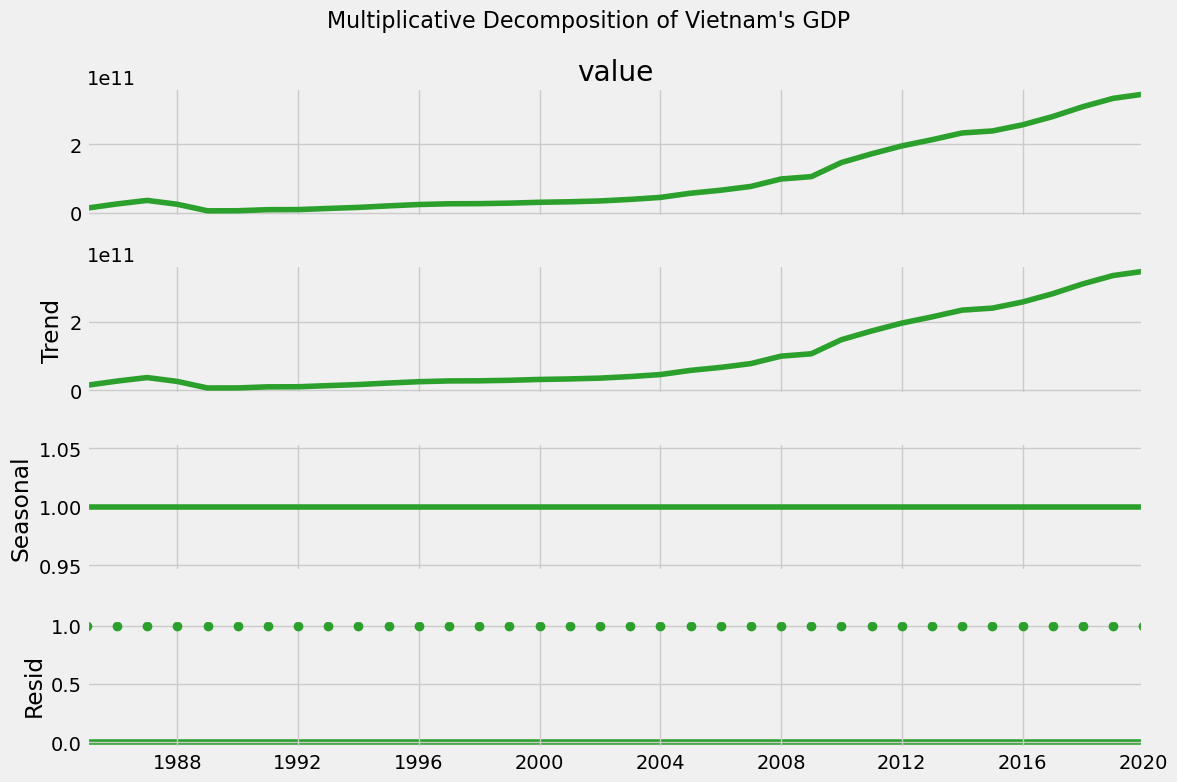

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform decomposition
decomposition = seasonal_decompose(data_sub['value'], model='multiplicative', period=1)

# Create the plot
fig = decomposition.plot()
fig.set_size_inches(12, 8)

# Change color of all lines to green
for ax in fig.axes:
    for line in ax.get_lines():
        line.set_color('#2ca02c')  # Typical green color

# Add title, save and show
plt.suptitle("Multiplicative Decomposition of Vietnam's GDP", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Multiplicative_Decomposition_Vietnam_GDP.png'), dpi=300, bbox_inches='tight')
plt.show()


Vietnam’s GDP shows a clear upward trend from 1986 to 2020. There’s no visible seasonality (flat line at 1.00), which makes sense since GDP is annual. The residuals are also almost flat, so there’s barely any noise in the data. This means the increase is mostly long-term and consistent—not influenced by seasonal effects.

In [91]:
# Run the Dickey-Fuller test on my time series values Vietnam's GDP
result = adfuller(data_sub['value'])  # GDP data

print("Dickey-Fuller Stationarity test:")
print(f"Test Statistic     : {result[0]}") 
print(f"p-value            : {result[1]}")        # low p-value (< 0.05) means likely stationary
print(f"Number of Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")

# Print critical values for 1%, 5%, and 10% significance levels
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key} : {value}")



Dickey-Fuller Stationarity test:
Test Statistic     : 4.569414764326011
p-value            : 1.0
Number of Lags Used: 0
Number of Observations Used: 35
Critical Values:
   1% : -3.6327426647230316
   5% : -2.9485102040816327
   10% : -2.6130173469387756


The test statistic is much higher than all three critical values. This means we cannot reject the null hypothesis, which assumes the data is not stationary.
p-value = 1.0 → extremely high → strong evidence of non-stationarity
The test statistic 4.57 is far above all three critical values: It's greater than -2.61 (10% level), so even at the most lenient threshold, we cannot reject the null hypothesis.

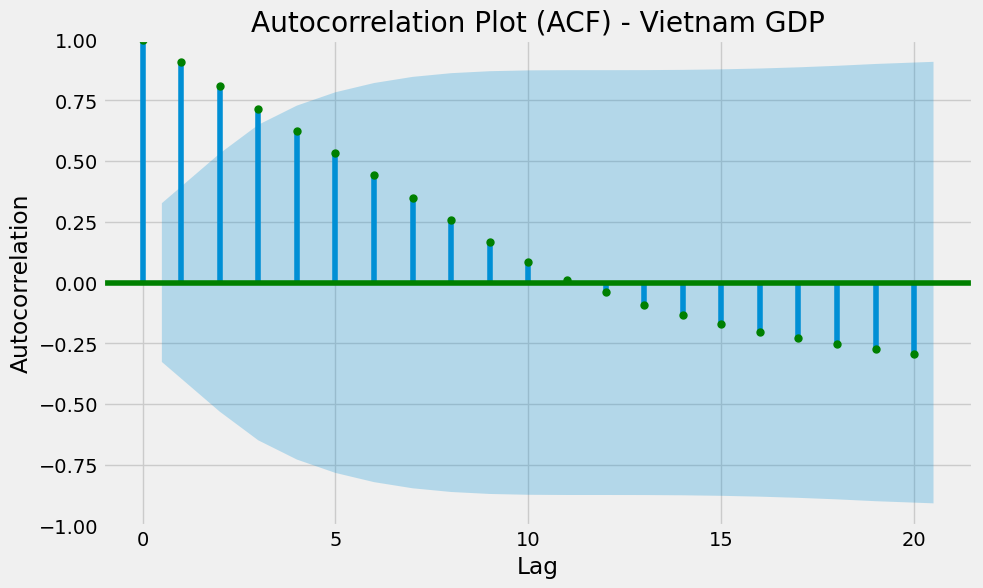

In [107]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Create the figure and plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(data_sub['value'], lags=20, ax=ax)

# Change all bar colors to green
for bar in ax.lines:
    bar.set_color('green')
for patch in ax.patches:
    patch.set_facecolor('green')

# Add labels and grid
ax.set_title("Autocorrelation Plot (ACF) - Vietnam GDP")
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.grid(True)

# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Autocorrelation_Plot_Vietnam_GDP.png'), dpi=300, bbox_inches='tight')
plt.show()


Several bars exceed the blue confidence area, especially at the first few lags. This means the data is autocorrelated, which confirms what we saw in the Dickey-Fuller test. Vietnam’s GDP time series is not stationary yet.

In [97]:
# Stationarizing the data
# Create a new column by subtracting each value from the previous one
data_diff = data_sub.copy() 
data_diff['value'] = data_diff['value'] - data_diff['value'].shift(1)

# Drop the first row because it is NaN after differencing
data_diff = data_diff.dropna()

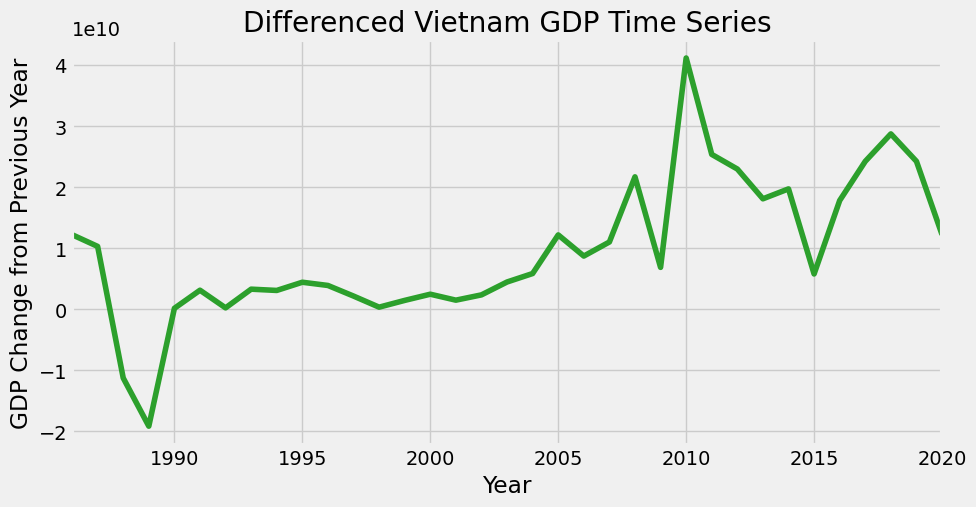

In [115]:
Differenced_Vietnam_GDP_Time_Series = data_diff['value'].plot(
    title='Differenced Vietnam GDP Time Series',
    figsize=(10, 5),
    color='#2ca02c'  # Green
)
plt.ylabel('GDP Change from Previous Year')
plt.xlabel('Year')
plt.grid(True)
plt.savefig(os.path.join(path, '04 Analysis', 'Differenced_Vietnam_GDP_Time_Series.png'), dpi=300, bbox_inches='tight')
plt.show()


In [301]:
# Run Dickey-Fuller Stationary test again
result = adfuller(data_diff['value'])

print("Dickey-Fuller Test Results:")
print(f"Test Statistic     : {result[0]}")
print(f"p-value            : {result[1]}")
print(f"Number of Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key} : {value}")

Dickey-Fuller Test Results:
Test Statistic     : -1.8739467963928962
p-value            : 0.3444148451727469
Number of Lags Used: 1
Number of Observations Used: 33
Critical Values:
   1% : -3.6461350877925254
   5% : -2.954126991123355
   10% : -2.6159676124885216


-1.87 is not smaller than critical values, especially -2.95 (5% level)
Also, p-value is 0.344, which is way higher than 0.05 so the data is still non-stationary after first differencing. 

In [103]:
# Stationarizing the data second time
data_diff_2 = data_diff.copy() 
data_diff_2['value'] = data_diff_2['value'] - data_diff_2['value'].shift(1)

# Drop the first row because it is NaN after differencing
data_diff_2 = data_diff_2.dropna()

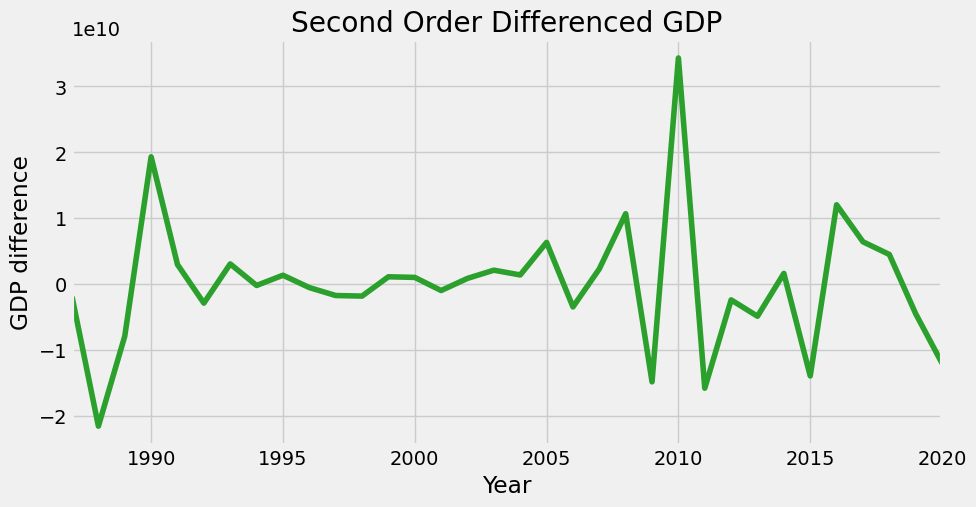

In [117]:
Second_Order_Differenced_GDP= data_diff_2['value'].plot(title='Second Order Differenced GDP', figsize=(10,5),  color='#2ca02c')
plt.ylabel('GDP difference')
plt.xlabel('Year')
plt.grid(True)
plt.savefig(os.path.join(path,'04 Analysis', 'Second_Order_Differenced_GDP.png'), dpi=300, bbox_inches='tight')

plt.show()


In [312]:
# Run Dickey-Fuller Stationary test again
result = adfuller(data_diff_2['value'])

print("Dickey-Fuller Test Results:")
print(f"Test Statistic     : {result[0]}")
print(f"p-value            : {result[1]}")
print(f"Number of Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key} : {value}")

Dickey-Fuller Test Results:
Test Statistic     : -7.788527129036797
p-value            : 8.057658176122266e-12
Number of Lags Used: 0
Number of Observations Used: 33
Critical Values:
   1% : -3.6461350877925254
   5% : -2.954126991123355
   10% : -2.6159676124885216


The test statistic is much lower than all critical values.
The p-value is basically zero, which confirms the result is statistically significant.
I can now confidently reject the null hypothesis. The data is now stationary.